In [85]:
# importing all the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [86]:
# reading the data
df = pd.read_csv('diabetes.csv')

In [87]:
# checking the shape of the data
df.shape

(768, 9)

In [88]:
# check the top 5 rows of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
# checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
#checking for the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(df.drop('Outcome', axis = 1))

StandardScaler()

In [93]:
featured_col = scaler.transform(df.drop('Outcome', axis = 1))

In [94]:
featured_col = pd.DataFrame(featured_col, columns = df.columns[:-1])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(featured_col, df['Outcome'], test_size = 0.3, random_state = 10)
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train, y_train)
pred = Knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[117  27]
 [ 43  44]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       144
           1       0.62      0.51      0.56        87

    accuracy                           0.70       231
   macro avg       0.68      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231



In [96]:
#checking the K values with respect to the error rate of predcited values

error_rate = []
for i in range(1,40):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_test, y_test)
    pred_i = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error_rate')

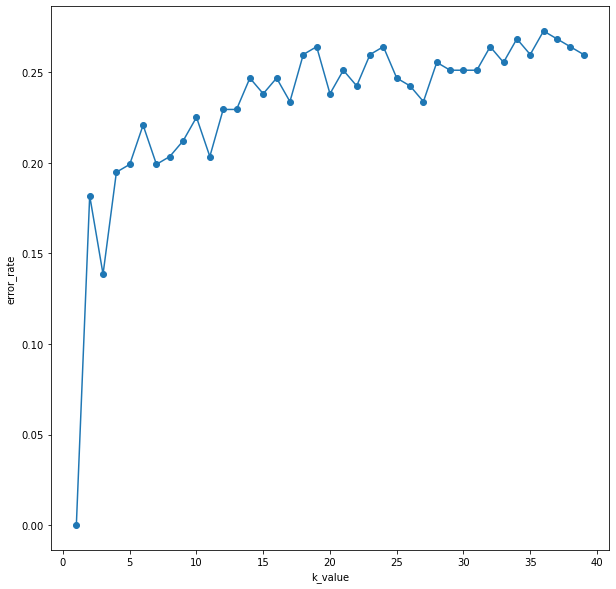

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(range(1,40), error_rate, marker= 'o')
plt.xlabel('k_value')
plt.ylabel('error_rate')

In [98]:
# now taking k = 1 again
Knn = KNeighborsClassifier(n_neighbors=9)
Knn.fit(X_train, y_train)
pred = Knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[125  19]
 [ 50  37]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       144
           1       0.66      0.43      0.52        87

    accuracy                           0.70       231
   macro avg       0.69      0.65      0.65       231
weighted avg       0.69      0.70      0.68       231



#### using the Hyperparameter Optimization - GridSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_test,y_test)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7404255319148937
Best Parameters: {'n_neighbors': 9}
